In [ ]:
"""
Total:  2/5
"""

### Exercise 7 : (Entirely in Jupyter notebook) Let us consider the initial value problem
 
	y"+5y'-6y=0  y(0)=2,  y'(0)=3    (7)
 #### 1. Find the exact solution, $ y $, of equation (7)

In [ ]:
"""
Mark: 1/1
"""

 equation (7) is a second order ODE with constant coefficient and without second member. his caracteristique equation is given by:
 \begin{align*}
 	r^{2}+5r-6=0
 \end{align*}
 let solve this equation:
 \begin{align*}
 	r^{2}+5r-6=0&\implies (r-1)(r+6)=0\\&\implies r=-6 \quad ou\quad r=-1
 \end{align*}
 We have two real solutions which mean that the general solution of equation (7)}is:
 \begin{align*}
 	y(x)=Ae^{x}+Be^{-6x}; \qquad A, B\in\mathbb{R}
 \end{align*}
 Now to find $A$ and $B$, we have:
 \begin{align*}
 	\begin{cases}
 		y(0)=2\\
 		y'(0)=3	
 	\end{cases}
 \end{align*}
 And $y'(x)=Ae^{x}-6Be^{-6x}$ ie $y'(0)=A-6B$ this give the system:
 \begin{align*}
 	\begin{cases}
 		A-6B=3\\A+B=2
 	\end{cases}
 \end{align*}
 Solving this give:$\begin{cases}
 	A=\dfrac{15}{7}\\B=\dfrac{-1}{7}
 \end{cases}$\\
 The Solution of (7) is then \begin{align*}
 	y(x)=\dfrac{15}{7}e^{x}+\dfrac{-1}{7}e^{-6x}
 \end{align*} 
  

### Compare graphically on the interval [0, 1], your exact solution against both numericalsolutions obtained with
##### a.Python in-built function odeint,
##### b.your own python function based on the fourth order Runge-Kutta method (RK4), and a space step size $h = 10^{-2}$


 Let $u=y$ and $v=y'$ then equation (7) is equivalent to the following system:
	$ \begin{cases}
	 \dfrac{dv}{dx}=6u-5v\\
	 \dfrac{du}{dx}=v
	\end{cases}\qquad u(0)=2\quad v(0)=3$

### let plot the solutions (numerical and exact) using Python in-built function odeint,

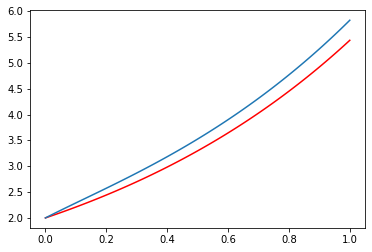

In [5]:
"""
Mark: 1/2
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



# function that returns dz/dt
def model(z,x):"""Check this out"""
    u,v = z 
    dvdx = 6*u-5*v
    dudx = v
    return dvdx,dudx """Check this out"""

# initial condition
z0 = [3,2]

# time points
a = 0
b = 1
N = 100
x = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,x)
y=15/7*np.exp(x)-1/7*np.exp(-6*x)
v = z[:,0]
u = z[:,1]
#plt.subplot(2,1,1)
plt.plot(x,u,'r-');
#plt.title('numerical solution')
#plt.subplot(2,1,2)
#plt.title('exact solution')
plt.plot(x,y)

 ### Now we use RK4

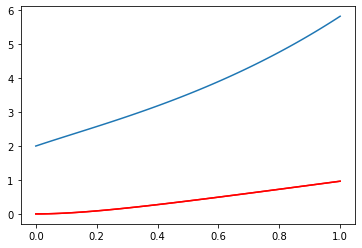

In [2]:
"""
Mark: 0/1
"""
u0=2
v0=3
def f(u,v):
    return 6*u-5*v

h=1/100  # h=10^{-2}
t=np.linspace(a,b,N+1)
z=np.zeros((N+1,2))
z[1,:]=[v0,u0]
for k in range(N):
    k1=f(t[k],z[k,:])
    k2=f(t[k]+h/2,z[k,:]+h/2*k1)
    k3=f(t[k]+h/2,z[k,:]+h/2*k2)
    k4=f(t[k]+h,z[k,:])+h*k3
    z[k+1,:]=z[k,:]+h/6*(k1+2*k2+2*k3+k4)
    
#plt.subplot(2,1,1)
plt.plot(t,z,'r-');
#plt.title('RK4 solution')
#plt.subplot(2,1,2)
#plt.title('exact solution')
plt.plot(x,y); 


### Order of convergence

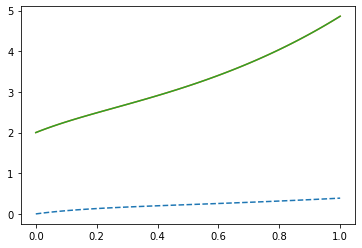

In [3]:
"""
Mark: 0/1
"""
H=[1/10,1/100,1/1000,1/10000,1/100000]
errk4=abs(y.reshape(-1,1)-z)
erod=abs(y.reshape(-1,1)-u.reshape(-1,1))
plt.plot(t,erod,'--');
plt.plot(t,errk4);